In [1]:
from bioinfokit.analys import stat, get_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = get_data("plant_richness_lr").data
df.to_csv("plant_richness.csv")

In [3]:
df = pd.read_csv("plant_richness.csv")

In [4]:
df.head(5)

,Unnamed: 0,ntv_rich,area
0,0,1.897627,1.602060
1,1,1.633468,0.477121
2,2,2.597695,3.432488
3,3,2.238046,1.785330
4,4,2.712650,3.075547


In [5]:
#creating x() and y() variables

X = df['area']     #independent variable
y = df['ntv_rich'] #dependent variable

In [6]:
print(type(X));

<class 'pandas.core.series.Series'>


In [7]:
print(type(y))

<class 'pandas.core.series.Series'>


In [8]:
X = np.array(X).reshape(-1,1) #sklearn requires 2D array

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X,y)

LinearRegression()

In [10]:
reg.coef_  #slope 

array([0.35573936])

In [11]:
reg.intercept_  #y- intercept

1.336048282149355

In [12]:
# predicting a new value - y = mx+c
y = 0.35573936 * 2.5 + 1.336048282149355
y

2.2253966821493547

In [13]:
y_pred = reg.predict([[2.5]])
y_pred

array([2.22539668])

In [14]:
#Add a constant
#creating x() and y() variables

X = df['area']     #independent variable
y = df['ntv_rich'] #dependent variable

In [15]:
import statsmodels.api as sm

X = sm.add_constant(X)
#Fit the simple Linear regression model
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ntv_rich   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     96.13
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           4.40e-09
Time:                        15:10:04   Log-Likelihood:                 4.0471
No. Observations:                  22   AIC:                            -4.094
Df Residuals:                      20   BIC:                            -1.912
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3360      0.096     13.869      0.000       1.135       1.537
area           0.3557      0.036      9.805      0.000       0.280       0.431
==============================================================================
Omnibus:                        0.057   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.278
Skew:                          -0.033   Prob(JB):                        0.870
Kurtosis:                       2.453   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

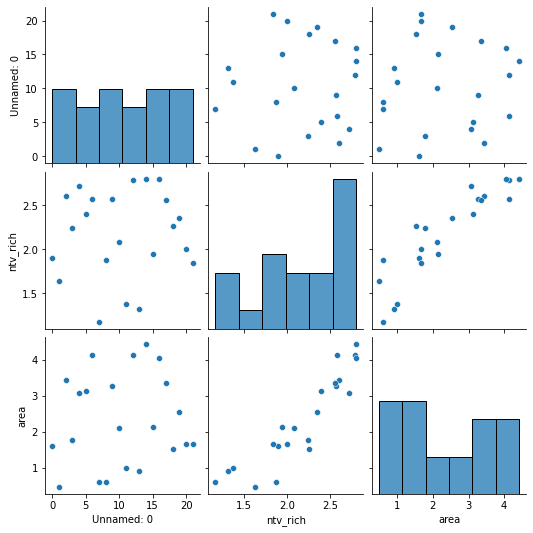

In [16]:
sns.pairplot(df)

In [17]:
df.corr()

,Unnamed: 0,ntv_rich,area
Unnamed: 0,1.000000,0.051442,0.088381
ntv_rich,0.051442,1.000000,0.909827
area,0.088381,0.909827,1.000000
